In [2]:
import pyslise as ps

In [3]:
n = 2
E= 3

def f(x):
    # return matrix(RDF, [[x**(3 if i == j else 1)+ i+j for i in [1..n]] for j in [1..n]])
    return matrix(RDF, x*x*identity_matrix(RDF, n, n))


scs = ps.Pyscs(f, n, 0, 5, 32)

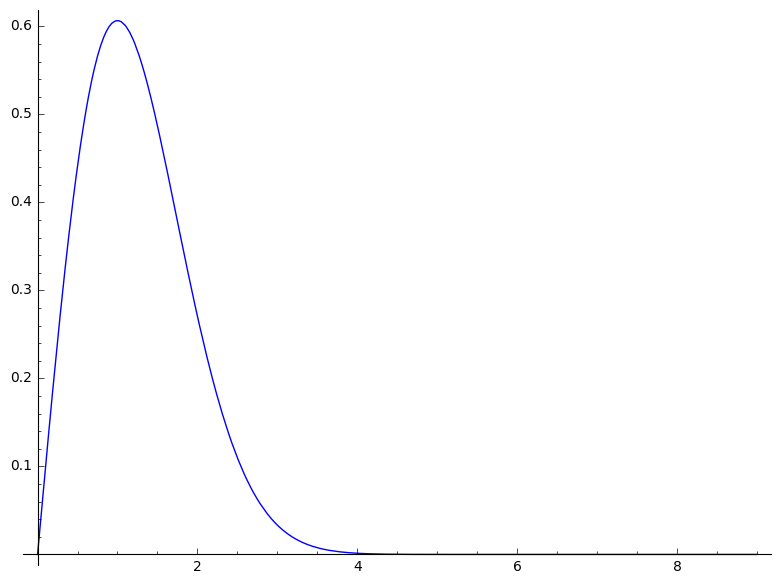

In [4]:
plot(lambda x: scs.propagate(E, [matrix.zero(RDF, n, n), matrix.identity(RDF, n, n)], 0, x)[0][0][0], (0,9))

In [5]:
T = ode_solver(error_abs=1e-16, error_rel=1e-16)
T.function = lambda t, y: block_matrix(
        [[matrix.zero(RDF, n, n), matrix.identity(RDF, n, n)], [f(t)-E*matrix.identity(RDF, n,n), matrix.zero(RDF, n, n)]]
    ) * vector(RDF, y)
T.y_0 = [0]*n + [1] + [0]*(n-1)
T.algorithm = 'rk8pd'

In [8]:
T.ode_solve(t_span=[0., 3.], num_points=2^8)
T.solution[-1]

(3.0, [0.03332698961472737, 0.0, -0.08887197230593753, 0.0])

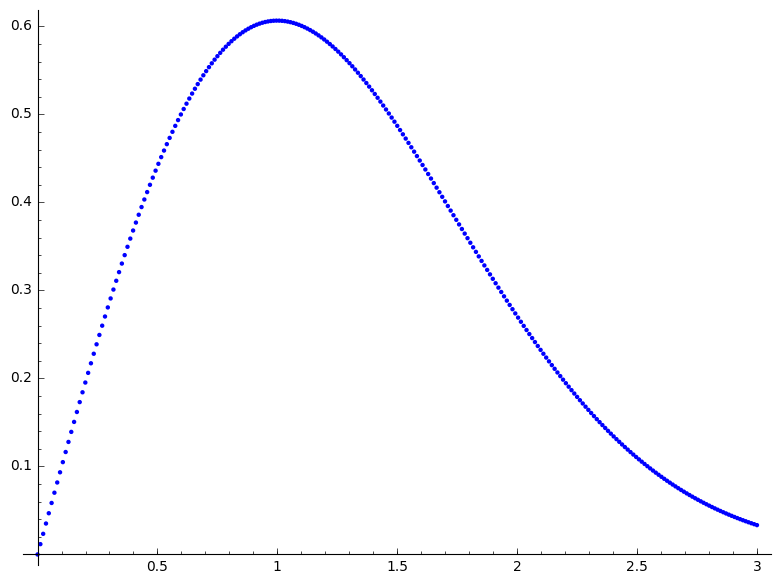

In [9]:
T.plot_solution()